In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
train_df = pd.read_csv("./drive/MyDrive/PUbG/train_up.csv")
train_df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,...,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112875e+06
mean,2.339239e-01,1.107759e+00,1.308017e+02,6.587818e-01,2.268834e-01,1.370783e+00,4.758207e+01,5.050118e+02,9.252460e-01,5.442054e-01,...,1.648183e-01,6.069331e+02,3.505119e-03,4.531070e+00,2.380917e-02,7.908442e-03,1.154895e+03,3.662081e+00,6.064482e+02,4.730654e-01
std,5.887983e-01,1.716308e+00,1.707582e+02,1.146708e+00,6.026371e-01,2.679204e+00,2.746282e+01,6.275414e+02,1.558777e+00,7.111749e-01,...,4.720282e-01,1.500459e+03,7.387977e-02,3.060910e+01,1.672109e-01,9.265749e-02,1.183496e+03,2.459287e+00,7.397138e+02,3.074168e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.553000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.435000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.867000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.862000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.171000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,3.818250e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.978000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.000000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,2.718000e+03,1.000000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.001000e+03,1.000000e+00


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3112876 entries, 0 to 3112875
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [5]:
train_df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2a718802964d4d,c1827980642b62,9a78c7efc2795b,0,1,23.54,0,0,1,47,...,0,0.0,0,0.00,0,0,2600.0,5,1485,0.7143
1,a4ea8117a0d762,85ed9d49426dcc,0b08d1f70bc0e4,0,0,46.04,0,0,0,58,...,0,0.0,0,0.00,0,0,239.0,1,1555,0.3500
2,abad453008c6f9,30338d07f9de75,2ae027da487bb2,1,0,51.60,0,0,0,62,...,0,0.0,0,0.00,0,0,1589.0,4,1441,0.5556
3,fba3f5b8dfccc4,206f8c8edfb9a2,a7ea160d40e9f1,2,2,165.20,0,0,1,50,...,0,0.0,0,48.32,0,0,3180.0,8,0,0.7778
4,6892c6f3ea7930,2f573dbd371da9,c84a9837c833c7,0,0,14.69,0,0,0,37,...,0,5218.0,0,0.00,0,0,1687.0,3,1500,0.4000


# Pre-Processing the data

### Dealing with missing values

Calculating the missing values in each column

In [6]:
train_df.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

There only 1 missing value in winPlacePerc. 

Checking the row with missing value

In [7]:
train_df.loc[train_df['winPlacePerc'].isna(),:]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
387851,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


Droping the row with missing value

In [8]:
train_df.drop(axis="rows", labels=train_df.index[train_df["winPlacePerc"].isna()], inplace=True)

In [9]:
train_df.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

### Dealing the duplicated rows

Checking number of duplicated rows

In [10]:
train_df.duplicated().sum()

0

There are no duplicated rows

### Label Encoding


There is only 1 column which has categorical data,i.e.,matchType. We will do label encoding in this column 

In [11]:
labelEncoder = LabelEncoder()
encoded = labelEncoder.fit_transform(train_df["matchType"])
train_df["matchType"].unique(),np.unique(encoded)

(array(['squad-fpp', 'duo-fpp', 'normal-squad-fpp', 'squad', 'solo-fpp',
        'duo', 'solo', 'normal-duo-fpp', 'flaretpp', 'crashtpp',
        'normal-solo', 'crashfpp', 'normal-squad', 'normal-solo-fpp',
        'normal-duo', 'flarefpp'], dtype=object),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]))

In [12]:
train_df["matchType"] = encoded
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3112875 entries, 0 to 3112875
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        int64  
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [13]:
train_df["Id"] = labelEncoder.fit_transform(train_df["Id"])
train_df["matchId"] = labelEncoder.fit_transform(train_df["matchId"])
train_df["groupId"] = labelEncoder.fit_transform(train_df["groupId"])

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3112875 entries, 0 to 3112875
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               int64  
 1   groupId          int64  
 2   matchId          int64  
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        int64  
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [14]:
train_df.head(20)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,515694,1301253,28867,0,1,23.54,0,0,1,47,...,0,0.0,0,0.00,0,0,2600.00,5,1485,0.7143
1,2005698,902286,2030,0,0,46.04,0,0,0,58,...,0,0.0,0,0.00,0,0,239.00,1,1555,0.3500
2,2087974,324684,8011,1,0,51.60,0,0,0,62,...,0,0.0,0,0.00,0,0,1589.00,4,1441,0.5556
3,3059764,218395,31407,2,2,165.20,0,0,1,50,...,0,0.0,0,48.32,0,0,3180.00,8,0,0.7778
4,1273299,318809,37438,0,0,14.69,0,0,0,37,...,0,5218.0,0,0.00,0,0,1687.00,3,1500,0.4000
5,767207,1481116,3646,0,0,42.11,0,0,0,68,...,0,0.0,0,0.00,0,0,152.40,2,0,0.2857
6,287983,67706,24389,0,0,58.86,0,0,0,86,...,0,0.0,0,0.00,0,0,191.10,0,1504,0.0714
7,524917,586799,10046,0,0,235.50,0,0,3,36,...,0,0.0,0,0.00,0,0,173.00,6,1572,0.5638
8,176695,1501085,19704,0,0,0.00,0,0,0,77,...,0,0.0,0,0.00,0,0,47.28,0,1414,0.2577
9,1837679,205841,44389,1,3,275.60,2,0,3,2,...,1,0.0,0,93.66,0,0,2992.00,5,1441,0.8800


# Exploratory data analysis

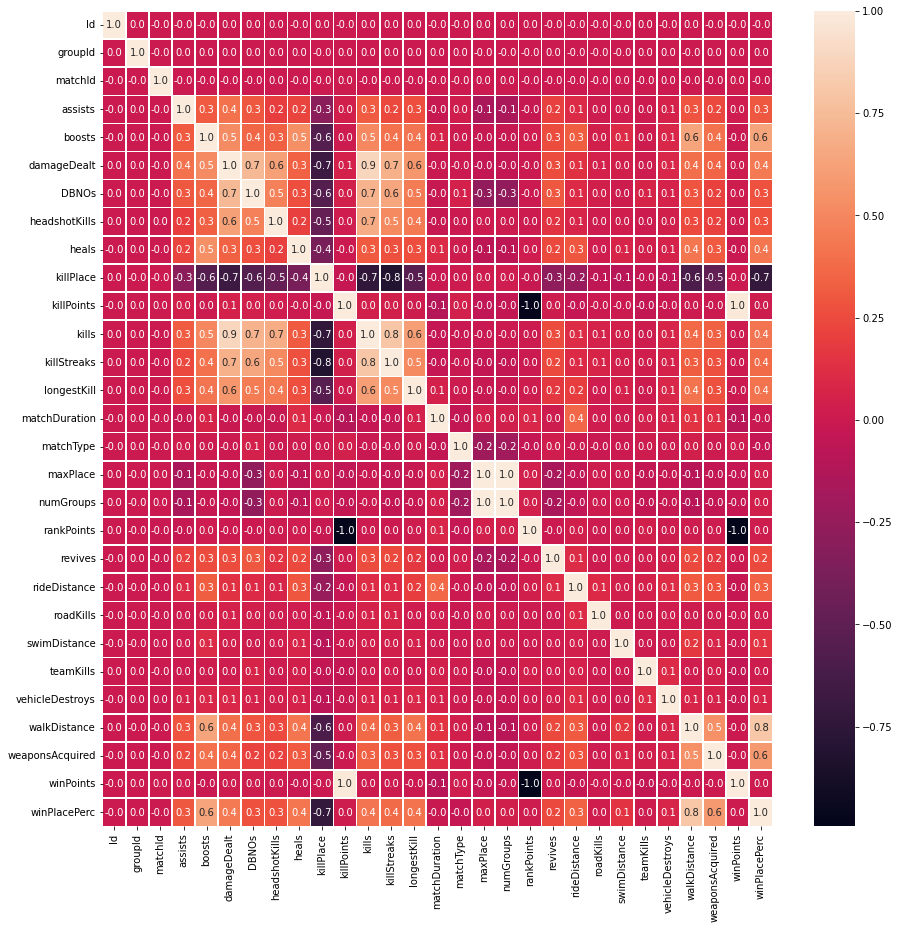

In [19]:
train_copy = train_df.copy()
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(train_copy.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()